# kNN: k Nearest Neighbor silicon

In [1]:
# Imports
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Read the CSV file

In [3]:
# Read the csv file into a pandas DataFrame
silicon = pd.read_csv('presolargrains_Si_for_SVM.csv')
silicon.head()

,Type,silicon_29_28,silicon_30_28
0,X,-662.0,-770.0
1,X,-451.0,-719.0
2,X,-594.0,-717.0
3,X,-499.0,-709.0
4,X,-366.0,-705.0


In [4]:
# Set Type for y value
X = silicon.drop("Type", axis=1)
y = silicon['Type'].values.reshape(-1, 1)
target_names = ["AB", "C", "M", "N", "U", "X", "Y", "Z"]
print(X.shape, y.shape)

(14679, 2) (14679, 1)


In [5]:
# Label Encoder and Transform
label_encoder = LabelEncoder()

data = X.copy()

label_encoder.fit(data['silicon_29_28'])
label_encoder.transform(data.silicon_29_28)
label_encoder.fit(data['silicon_30_28'])
label_encoder.transform(data.silicon_30_28)
label_encoder.classes_

array([-770., -719., -717., ..., 2882., 3287., 5650.])

## Create Train Test Split

In [6]:
# Separate data into train and test buckets
data_train, data_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [7]:
# MinMaxScalar
data_minmax = MinMaxScaler().fit(data_train)

data_train_minmax = data_minmax.transform(data_train)
data_test_minmax = data_minmax.transform(data_test)


## Find the best k value

In [10]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 26, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train_minmax, y_train)
    train_score = knn.score(data_train_minmax, y_train)
    test_score = knn.score(data_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.963/0.811
k: 3, Train/Test Score: 0.904/0.862
k: 5, Train/Test Score: 0.896/0.879
k: 7, Train/Test Score: 0.895/0.882
k: 9, Train/Test Score: 0.893/0.887
k: 11, Train/Test Score: 0.892/0.887
k: 13, Train/Test Score: 0.891/0.888
k: 15, Train/Test Score: 0.891/0.888
k: 17, Train/Test Score: 0.890/0.889
k: 19, Train/Test Score: 0.891/0.890
k: 21, Train/Test Score: 0.891/0.892
k: 23, Train/Test Score: 0.891/0.891
k: 25, Train/Test Score: 0.890/0.891


## Plot the train and test scores

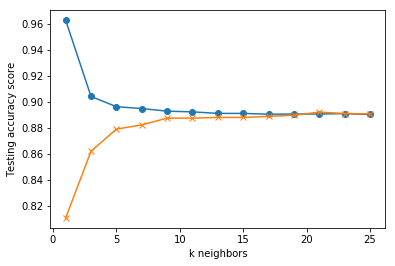

In [11]:
# Plot train scores in blue with marker 'o' and test scores in orange with marker 'x'
plt.plot(range(1, 26, 2), train_scores, marker='o')
plt.plot(range(1, 26, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

## Train the model and return the test score

In [12]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(data_train_minmax, y_train)
print('k=21 Test Acc: %.3f' % knn.score(data_test_minmax, y_test))

k=21 Test Acc: 0.892


## Save the model

In [13]:
# Save model to file
filename = 'kNN_Si.sav'
joblib.dump(knn, filename)

['kNN_Si.sav']

## Summary:

### k Nearest Neighbor for Silicon isotopes (k=21): 89.2%